<a href="https://colab.research.google.com/github/Joycee2/CAPSTONE/blob/main/MY_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MY 3MTT CAPSTONE PROJECT**
### Project Done By: **Agu Joy Chiamaka**

Project Presentation:- [Click Here To View Presentation](https://docs.google.com/presentation/d/1O1u3VcCTQduQ0HPezLPfiTZQOQ92aMGSQfFlU7GK3Xs/edit?usp=sharing)


Project Technical Report:- [Click Here To View Report](https://docs.google.com/document/d/1BGASdhUTSiFtvBUAOQgyrChJdIdowxYIjNjOMBZ17Bw/edit?usp=sharing)

## PROBLEM STATEMENT

#####Public Health organizations experience difficulties in predicting how COVID-19 virus spreads amongst people and what affects the virus transmission and patient outcomes. HealthGuard Analytics needs me, as a Data Scientist, to develop a data-driven system using past COVID-19 data, which will help in finding useful insights. The goal is to help make better policies, prepare for future outbreaks and manage healthcare resources effectively.




#### ***Primary Objectives***:
#### 1. Generate actionable insights by:


*   Identifying key factors influencing the transmission and
  outcomes of COVID-19 virus

*   Provide data-driven insights to inform public health policies
  and interventions.  




#### 2. Support Public Health Decision-making by:

*   Using predictions to predict future outbreaks and allocate
  resources effectively.



#### 3. Develop a Prediction Modeling System by:


*   Building a machine learning model to forcast COVID-19 trends,
  such as infection rates, hospitalization needs or mortality rates.


#### ***Secondary Objectives:***
#### 1. Data Exploration and Cleaning by:

*    Performing data preprocessing, including cleaning, standardizaton and feature engineering to ensure high-quality inputs for analysis and modeling.

#### 2. Exploratory Data Analysis (EDA):


*    Analyze trends, correlations and outliers in the data to uncover patterns that can inform both modeling and decision-making.






#### **Phase 1 - Data Acquisition and Preparation**



Data Source Kaggle
- [Download Datasets Here from Kaggle](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)


In [2]:
#Importing libraries for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Importing libraries for machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### **Task 1.2: Load in all the datasets**

In [3]:
#Loading my datasets
df1 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/country_wise_latest.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/covid_19_clean_complete.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/day_wise.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/full_grouped.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/usa_county_wise.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Capstone Dataset/worldometer_data.csv")

In [4]:
#viewing the first dataset
df1.head(1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.5,69.49,5.04,35526,737,2.07,Eastern Mediterranean


In [5]:
#checking the shape of df1
df1.shape
#df1 has 187 rows and 15 columns

(187, 15)

In [6]:
#viewing the columns
df1.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [7]:
#viewing the last five items
df1.tail(0)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


In [8]:
#viewing the second dataset
df2.head(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region


In [9]:
#viewing df2 shape
df2.shape

(49068, 10)

In [10]:
#viewing the columns of df2
df2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [11]:
#viewing the last items on df2
df2.tail(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49066,NaN,Tajikistan,38.861,71.2761,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610,28.2336,2020-07-27,505,12,128,365,Africa


In [12]:
#checking for null values for df2
df2.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [13]:
#handling missing values for df2
df2["Province/State"].fillna("Unkwown", inplace = True)

In [14]:
#checking if the missing values has been filled
df2.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [15]:
#checking for duplicates in df2
df2.duplicated().sum() #there are no duplicates

0

In [16]:
#checking the info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  49068 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [17]:
#standardizing necessary columns
df2["Date"] = pd.to_datetime(df2["Date"])


In [18]:
#checking df2 data type
df2.dtypes

,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object


In [19]:
#viewing the third dataset
df3.head(0)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries


In [20]:
#checking df3 columns
df3.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [21]:
#checking shape
df3.shape

(188, 12)

In [22]:
#viewing the fourth dataset
df4.head(0)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region


In [23]:
#checking df4 shape
df4.shape

(35156, 10)

In [24]:
#checking df4 coumns
df4.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [25]:
#checking for missing values in df4
df4.isnull().sum() #there are no missing values

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [26]:
#checking for duplicates in df4
df4.duplicated().sum() #there are no duplicates

0

In [27]:
#checking df4 datatypes
df4.dtypes

,0
Date,object
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
WHO Region,object


In [28]:
#standardizing necessary columns
df4["Date"] = pd.to_datetime(df4["Date"])

In [29]:
df4.dtypes

,0
Date,datetime64[ns]
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
WHO Region,object


In [30]:
#viewing the fifth dataset
df5.head(0)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths


In [31]:
#viewing the sixth dataset
df6.head(0)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region


In [32]:
#checking df6 columns
df6.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [33]:
#what columns does df2 and df4 have in common
df2.columns.intersection(df4.columns)


Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'WHO Region'],
      dtype='object')

#### **Task 1.3: Dataset Selection**



In [34]:
#merging df2 and df4 with the columns they have in common
mydata = pd.merge(df2, df4, on = ["Date", "Country/Region", "Confirmed", "Deaths", "Recovered", "Active", "WHO Region"], how = "outer" )
mydata.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Unkwown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0


#### **Task 2.1: Data Exploration And Cleaning**

In [35]:
#checking mydata shape
mydata.shape

(50197, 13)

In [36]:
#checking for duplicates
mydata.duplicated().sum()

0

In [37]:
#checking for missing values
mydata.isnull().sum()

,0
Province/State,1129
Country/Region,0
Lat,1129
Long,1129
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [38]:
#calculating total population
total_population = df6["Population"].sum()
print(f"Total Population: {total_population}") #the total polpulation for the global Virus outbreak is 6326421290, which is over six billion

Total Population: 6326421290.0


#### **Task 2.2: Handling Missing Values**

In [39]:
#fill missing values
mydata["Province/State"].fillna("0", inplace = True)

In [40]:
#creating an algorithm to fill missing values
def fill_missing_values(df, strategy='mean', column=None):
    """
    Fill missing values in a DataFrame based on the specified strategy.

    Parameters:
    df (pd.mydata): The DataFrame containing missing values.
    strategy (str): The strategy for filling missing values ('mean', 'median', 'mode', 'ffill', 'bfill', or a constant).
    column (str, optional): Specific column to fill. If None, fill for all columns.

    Returns:
    pd.mydata: DataFrame with missing values filled.
    """

    if column:
        # Handle specific column
        if strategy == 'mean':
            df[column].fillna(df[column].mean(), inplace=True)
        elif strategy == 'median':
            df[column].fillna(df[column].median(), inplace=True)
        elif strategy == 'mode':
            df[column].fillna(df[column].mode()[0], inplace=True)
        elif strategy == 'ffill':
            df[column].fillna(method='ffill', inplace=True)
        elif strategy == 'bfill':
            df[column].fillna(method='bfill', inplace=True)
        elif isinstance(strategy, (int, float, str)):
            df[column].fillna(strategy, inplace=True)
        else:
            raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'mode', 'ffill', 'bfill' or provide a constant value.")

    else:
        # Handle all columns
        for col in df.columns:
            if df[col].dtype in [np.float64, np.int64]:  # Numeric columns
                if strategy == 'mean':
                    df[col].fillna(df[col].mean(), inplace=True)
                elif strategy == 'median':
                    df[col].fillna(df[col].median(), inplace=True)
                elif strategy == 'mode':
                    df[col].fillna(df[col].mode()[0], inplace=True)
                elif strategy == 'ffill':
                    df[col].fillna(method='ffill', inplace=True)
                elif strategy == 'bfill':
                    df[col].fillna(method='bfill', inplace=True)
                elif isinstance(strategy, (int, float)):
                    df[col].fillna(strategy, inplace=True)
            else:  # Categorical columns
                df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode

    return df
mydata2 = fill_missing_values(mydata)
mydata2.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered
0,Unkwown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0.0,0.0,0.0
1,Unkwown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,0.0,0.0,0.0


In [41]:
#checking for missing value
mydata2.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [42]:
#viewing my columns
mydata2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'New cases',
       'New deaths', 'New recovered'],
      dtype='object')

#### **Task 2.3: Feature Engineering**

In [43]:
#deriving new columns
mydata2["TotalCases"] = mydata2["Confirmed"] + mydata2["Recovered"] + mydata2["Deaths"]
mydata2["CaseFatalityRate"] = round((mydata2["Deaths"]/mydata2["Confirmed"]) * 100,2)
mydata2["CaseFatalityRate"] = mydata2["CaseFatalityRate"].fillna(0)

mydata2["CaseRecoveryRate"] = round((mydata2["Recovered"]/mydata2["Confirmed"]) * 100,2)
mydata2["CaseRecoveryRate"] = mydata2["CaseRecoveryRate"].fillna(0)

mydata2["ActiveCasesRate"] = round((mydata2["Active"]/mydata2["Confirmed"]) * 100,2)
mydata2["GrowthRate"] = round((mydata2["New cases"]/mydata2["Confirmed"]) * 100,2)
mydata2["GrowthRate"] = mydata2["GrowthRate"].fillna(0)

mydata["DeathsGrowthRate"] = round((mydata["New deaths"]/mydata["Deaths"]) * 100,2)
mydata["DeathsGrowthRate"] = mydata["DeathsGrowthRate"].fillna(0)

mydata["RecoveredGrowthRate"] = round((mydata["New recovered"]/mydata["Recovered"]) * 100,2)
mydata["RecoveredGrowthRate"] = mydata["RecoveredGrowthRate"].fillna(0)

#creating month, weeks and day from Date column
mydata2["Month"] = mydata2["Date"].dt.month
mydata2["Week"] = mydata2["Date"].dt.isocalendar().week
mydata2["Day"] = mydata2["Date"].dt.day

#creating column for daily growth rate
mydata2["DailyGrowthRate"] = mydata2["New cases"].pct_change()
mydata2["DailyGrowthRate"] = mydata2["DailyGrowthRate"].fillna(0)

#creating column for mortality rate
mydata2["MortalityRate"] = mydata2["Deaths"] / total_population * 100
mydata2["MortalityRate"] = mydata2["MortalityRate"].fillna(0)




In [44]:
#merging population column to mydata2
mydata2 = pd.merge(mydata2, df6[["Country/Region", "Population"]], on = "Country/Region", how = "left")

#fill population missing value
mydata2["Population"].fillna(0, inplace = True)

mydata2.tail(0)



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,...,ActiveCasesRate,GrowthRate,DeathsGrowthRate,RecoveredGrowthRate,Month,Week,Day,DailyGrowthRate,MortalityRate,Population


In [45]:
total_population

6326421290.0

In [46]:
# calculate percentage daily growth rate for New cases in each country
mydata2['NewCasesDGR'] = mydata2.groupby('Country/Region')['New cases'].pct_change()
mydata2['NewCasesDGR'] = mydata2['NewCasesDGR'].fillna(0)
mydata2.head(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,...,GrowthRate,DeathsGrowthRate,RecoveredGrowthRate,Month,Week,Day,DailyGrowthRate,MortalityRate,Population,NewCasesDGR


In [47]:
mydata2.shape

(50197, 27)

In [48]:
mydata2[mydata2['Country/Region'] == "Nigeria"].head(0)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,...,GrowthRate,DeathsGrowthRate,RecoveredGrowthRate,Month,Week,Day,DailyGrowthRate,MortalityRate,Population,NewCasesDGR


#### **Phase 2 - Exploratory Data Analysis (EDA)**

In [49]:
#calculating basic info
datewise = mydata2.groupby(["Date"])[["Confirmed", "Deaths", "Recovered", "Active"]].sum().reset_index()

print("Basic Information")
print("Total number of Confirmed cases around the world", datewise["Confirmed"].iloc[-1])
print("Total number of Deaths cases around the world", datewise["Deaths"].iloc[-1])
print("Total number of Recovered cases around the world", datewise["Recovered"].iloc[-1])
print("Total number of Active cases around the world", datewise["Active"].iloc[-1])
print("Total number of Cases around the world", datewise["Deaths"].iloc[-1] + datewise["Recovered"].iloc[-1] + datewise["Active"].iloc[-1])
print("Total number of Closed case around the world", datewise["Recovered"].iloc[-1] + datewise["Deaths"].iloc[-1] )
print("Total number of Open case around the world", datewise["Confirmed"].iloc[-1] - datewise["Deaths"].iloc[-1] - datewise["Recovered"].iloc[-1])







Basic Information
Total number of Confirmed cases around the world 17288263
Total number of Deaths cases around the world 750632
Total number of Recovered cases around the world 9651710
Total number of Active cases around the world 6885921
Total number of Cases around the world 17288263
Total number of Closed case around the world 10402342
Total number of Open case around the world 6885921


In [50]:
#checking the continents /regions
mydata2["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [51]:
#checking the columns in my  merged dataset
mydata2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'New cases',
       'New deaths', 'New recovered', 'TotalCases', 'CaseFatalityRate',
       'CaseRecoveryRate', 'ActiveCasesRate', 'GrowthRate', 'DeathsGrowthRate',
       'RecoveredGrowthRate', 'Month', 'Week', 'Day', 'DailyGrowthRate',
       'MortalityRate', 'Population', 'NewCasesDGR'],
      dtype='object')

#### **Task 1.2 - EDA Continued: Analyzing Insights and Visualizations**

In [52]:
#world fatality rate
global_fatality_rate = (datewise["Deaths"].sum() / datewise["Confirmed"].sum()) * 100
print(f"Global Fatality Rate: {global_fatality_rate:.2f}%")

#world mortality rate
global_mortality_rate = (datewise["Deaths"].sum() / total_population) * 100
print(f"Global Mortality Rate: {global_mortality_rate:.2f}%")

Global Fatality Rate: 5.79%
Global Mortality Rate: 0.83%


In [53]:
#analyzing global trends
global_trends = mydata2.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
global_trends

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,1103,34,56,1013
2020-01-23,1297,36,60,1201
2020-01-24,1861,52,72,1737
2020-01-25,2840,84,78,2678
2020-01-26,4197,112,101,3984
...,...,...,...,...
2020-07-23,16306115,729806,8893145,6683164
2020-07-24,16590651,736095,9122472,6732084
2020-07-25,16848105,741042,9341664,6765399


In [54]:
#checking the months in my dataset
mydata2["Date"].dt.month_name().unique()


array(['January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

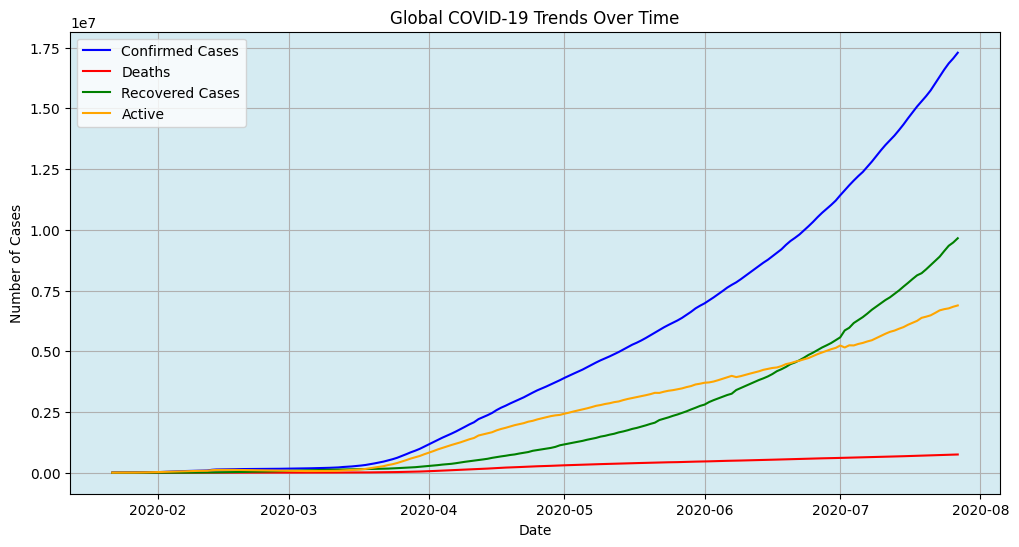

In [55]:
#plotting for global trend over time

plt.figure(figsize=(12, 6))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered Cases', color='green')
plt.plot(global_trends.index, global_trends['Active'], label='Active', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Trends Over Time')
plt.legend()
plt.grid()

#adding backgroud color
plt.gca().patch.set_facecolor('lightblue')
plt.gca().patch.set_alpha(0.5)

# Show the plot
plt.show()

#The exponential rise in confirmed cases signifies the urgent need for effective public health interventions.
#The gradual narrowing gap between active and recovered cases indicates improvement in pandemic management and recovery efforts globally.
#Deaths remain the lowest in proportion, which shows that while the pandemic is widespread, mortality rates remain relatively contained.

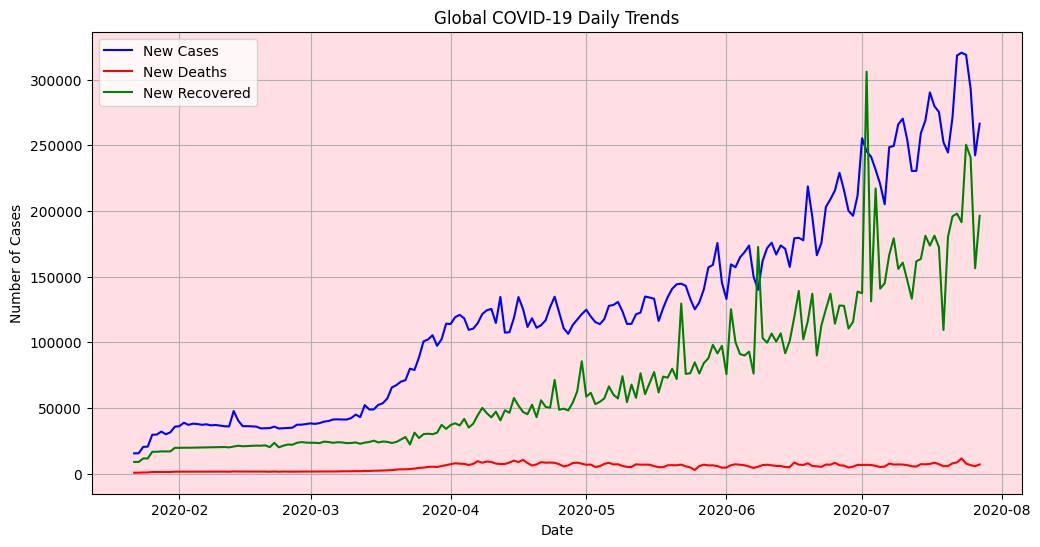

In [56]:
#global daily new trends
global_daily_trends = mydata2.groupby("Date")[["New cases", "New deaths", "New recovered"]].sum()
global_daily_trends

#plotting a line chart for global daily trends
plt.figure(figsize=(12, 6))
plt.plot(global_daily_trends.index, global_daily_trends['New cases'], label='New Cases', color='blue')
plt.plot(global_daily_trends.index, global_daily_trends['New deaths'], label='New Deaths', color='red')
plt.plot(global_daily_trends.index, global_daily_trends['New recovered'], label='New Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Global COVID-19 Daily Trends')
plt.legend()
plt.grid()

#adding backgroud color
plt.gca().patch.set_facecolor('pink')
plt.gca().patch.set_alpha(0.5)
plt.show()

#New Cases (Blue Line): There is a consistent increase in daily new cases, with peaks exceeding 300,000 in late July, indicating the pandemic's ongoing spread.
#New Recoveries (Green Line): Recoveries trend upward but exhibit significant fluctuations, likely reflecting regional reporting variations and treatment outcomes.
#New Deaths (Red Line): Deaths remain relatively stable and much lower compared to new cases, suggesting an improving global case-fatality ratio.
#The gap between new cases and new recoveries emphasizes the ongoing strain on healthcare systems and the need for preventive measures.

In [57]:

#interactive global daily new cases chart
import plotly.express as px
#Daily new cases globally
fig = px.line(
    mydata2,
    x='Date',
    y='New cases',
    title='Global Daily New Cases Over Time',
    labels={'New cases': 'Cases', 'Date': 'Date'},
    template='plotly_white'
)

# Enhance interactivity
fig.update_traces(mode='lines+markers', hovertemplate='Date: %{x}<br>Cases: %{y}')


# Show the chart
fig.show()


In [58]:
#regional distribution

region_distribution = mydata2["WHO Region"].value_counts()
region_distribution


,count
WHO Region,
Europe,15615
Western Pacific,10712
Africa,9024
Americas,8830
Eastern Mediterranean,4136
South-East Asia,1880


Regional Distribution of Total Confirmed Cases:
              WHO Region  Confirmed  Percentage
0                 Africa   21791827    2.401606
1               Americas  411617743   45.363038
2  Eastern Mediterranean   74082892    8.164432
3                 Europe  303308265   33.426607
4        South-East Asia   55118365    6.074414
5        Western Pacific   41466660    4.569904


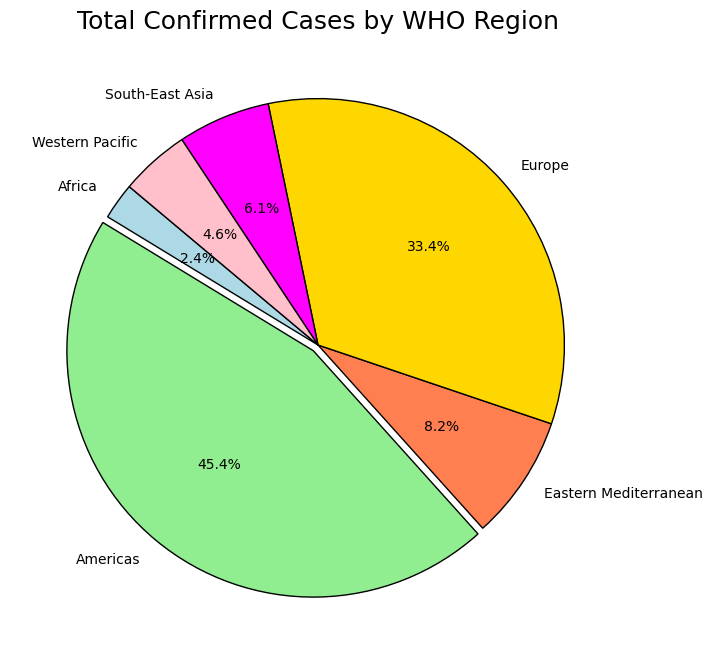

In [59]:
#a pie chart showing the share of total cases by continent
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Calculate Regional Distribution
# Group by 'Continent' to aggregate total confirmed cases
regional_distribution = mydata2.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Add percentages for better interpretation
regional_distribution['Percentage'] = (regional_distribution['Confirmed'] / regional_distribution['Confirmed'].sum()) * 100

# Print the distribution table
print("Regional Distribution of Total Confirmed Cases:")
print(regional_distribution)

# Pie Chart Visualization
# Data for the pie chart
labels = regional_distribution['WHO Region']
sizes = regional_distribution['Confirmed']
colors = ['lightblue', 'lightgreen', 'coral', 'gold', 'magenta', 'pink']  # Customize colors if needed
explode = [0.03 if i == sizes.idxmax() else 0 for i in range(len(sizes))]  # Emphasize the largest region

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Total Confirmed Cases by WHO Region', fontsize=18)

# Add hover info
fig = px.pie(regional_distribution, values='Confirmed', names='WHO Region', title='Total Confirmed Cases by WHO Region')
fig.update_traces(textinfo='percent+label', hoverinfo='label+percent+value')

plt.show()

#Americas (45.4%): The region accounts for the largest share of global confirmed cases, highlighting the pandemic's significant impact there.
#Europe (33.4%): The second-highest burden, reflecting the early and widespread outbreak in European countries.
#Eastern Mediterranean (8.2%): Moderate representation, possibly due to varying outbreak timelines and population density.
#South-East Asia (6.1%): Lower contribution, but cases are steadily increasing in this densely populated region.
#Africa (4.6%): Relatively low case numbers, potentially due to limited testing or later arrival of the pandemic.
#Western Pacific (2.4%): The smallest share, likely reflecting successful containment strategies in countries like China and Australia.


In [60]:
#calculating trends for Africa
africa_trends = mydata2[mydata2["WHO Region"] == "Africa"]
africa_trends = africa_trends.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
africa_trends


,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-07-23,656696,10978,385083,260635
2020-07-24,677376,11315,399574,266487
2020-07-25,694057,11683,420307,262067


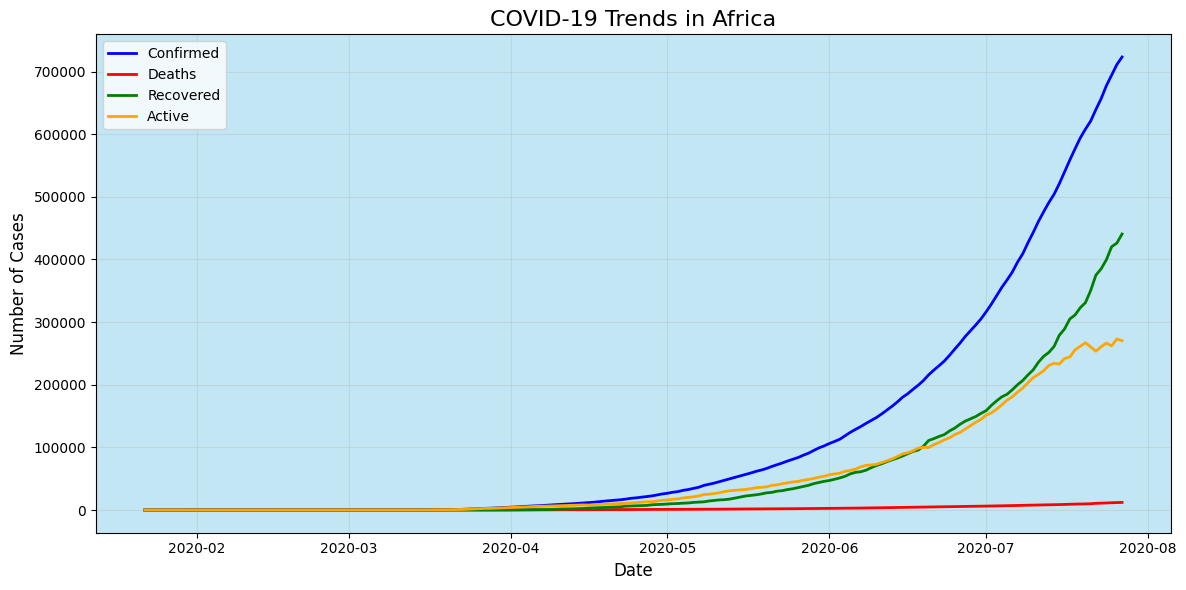

In [61]:
#plot Africa trend
region_trends = mydata2.groupby(['Date', 'WHO Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Example: Visualizing trends for a specific country (e.g., United States)
region_name = "Africa"
africa_trend = region_trends[region_trends['WHO Region'] == region_name]

# Plotting trends for the selected country
plt.figure(figsize=(12, 6))
plt.plot(africa_trend['Date'], africa_trend['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.plot(africa_trend['Date'], africa_trend['Deaths'], label='Deaths', color='red', linewidth=2)
plt.plot(africa_trend['Date'], africa_trend['Recovered'], label='Recovered', color='green', linewidth=2)
plt.plot(africa_trend['Date'], africa_trend['Active'], label='Active', color='orange', linewidth=2)

# Adding titles and labels
plt.title(f'COVID-19 Trends in {region_name}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

#adding backgroud color
plt.gca().patch.set_facecolor('skyblue')
plt.gca().patch.set_alpha(0.5)
plt.show()

#Rapid Case Growth: The exponential increase in confirmed cases highlights the swift spread of COVID-19 in Africa during this period, reflecting the contagious nature of the virus.

#High Recovery Rates: The significant upward trend in recovered cases suggests that a large proportion of infected individuals are recovering, indicating effective healthcare responses in many areas.

#Low Death Rate: The comparatively slow growth of deaths demonstrates that fatalities remained relatively low compared to the total number of cases, potentially due to a younger population, healthcare measures, or reporting differences.

#Active Cases Stabilizing: The plateauing of active cases towards the end of the timeline could indicate that recoveries are beginning to outpace new infections, a sign of potential pandemic control in the region.

In [62]:
# Summarizing trends for Africa
region_name = "Africa"
africa_trend = region_trends[region_trends['WHO Region'] == region_name]

# Calculate summary statistics
africa_summary = {
    "Peak Confirmed":africa_trend["Confirmed"].max(),
    "Peak Deaths": africa_trend["Deaths"].max(),
    "Peak Recovered":africa_trend["Recovered"].max(),
    "Peak Active Cases": africa_trend["Active"].max(),
    "Date of Peak Active Cases": africa_trend.loc[africa_trend["Active"].idxmax(), "Date"]
}

africa_summary

{'Peak Confirmed': 723207,
 'Peak Deaths': 12223,
 'Peak Recovered': 440645,
 'Peak Active Cases': 273083,
 'Date of Peak Active Cases': Timestamp('2020-07-26 00:00:00')}

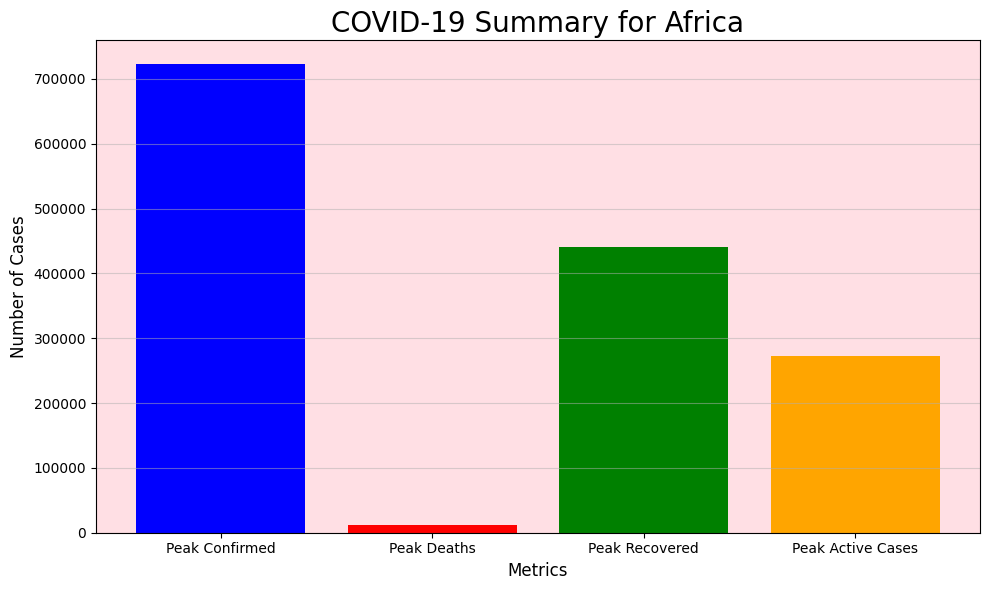

In [63]:
# Plotting the summary for Africa as a bar chart

# Prepare data for plotting
summary_labels = ["Peak Confirmed", "Peak Deaths", "Peak Recovered", "Peak Active Cases"]
summary_values = [
    africa_summary["Peak Confirmed"],
    africa_summary["Peak Deaths"],
    africa_summary["Peak Recovered"],
    africa_summary["Peak Active Cases"]
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(summary_labels, summary_values, color=['blue', 'red', 'green', 'orange'])
plt.title("COVID-19 Summary for Africa", fontsize=20)
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

#adding backgroud color
plt.gca().patch.set_facecolor('pink')
plt.gca().patch.set_alpha(0.5)
plt.show()

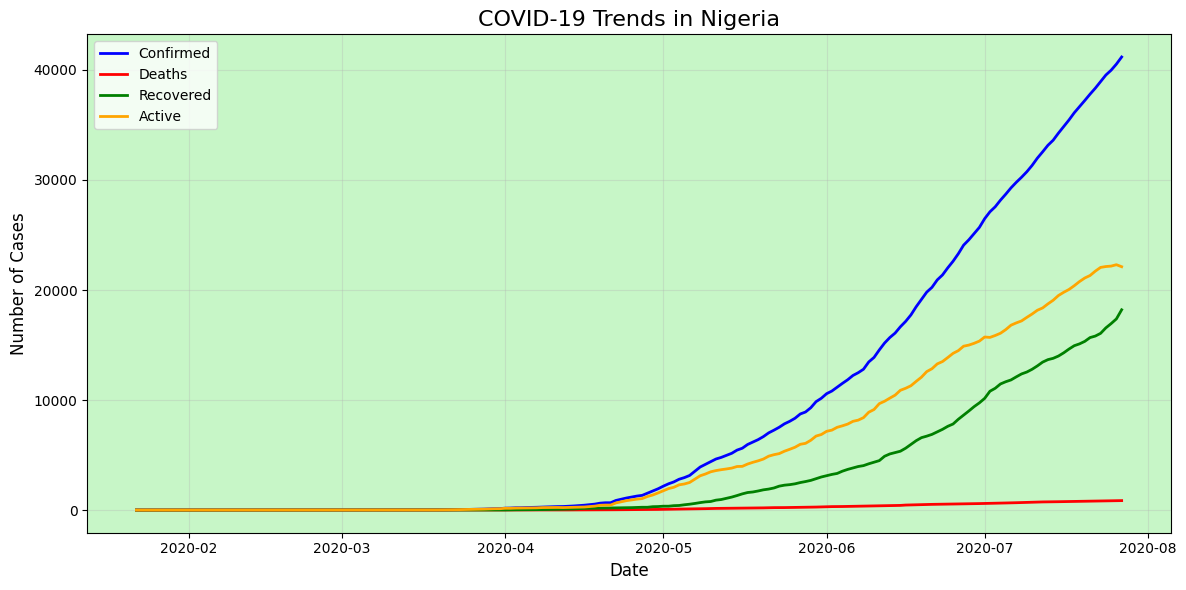

In [64]:
# Aggregating country/region-specific trends
country_trends = mydata2.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Example: Visualizing trends for a specific country (e.g., United States)
country_name = "Nigeria"
nig_trend = country_trends[country_trends['Country/Region'] == country_name]

# Plotting trends for the selected country
plt.figure(figsize=(12, 6))
plt.plot(nig_trend['Date'], nig_trend['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.plot(nig_trend['Date'], nig_trend['Deaths'], label='Deaths', color='red', linewidth=2)
plt.plot(nig_trend['Date'], nig_trend['Recovered'], label='Recovered', color='green', linewidth=2)
plt.plot(nig_trend['Date'], nig_trend['Active'], label='Active', color='orange', linewidth=2)

# Adding titles and labels
plt.title(f'COVID-19 Trends in {country_name}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

#adding backgroud color
plt.gca().patch.set_facecolor('lightgreen')
plt.gca().patch.set_alpha(0.5)
plt.show()

#The exponential increase in confirmed cases highlights the virus's rapid spread in Nigeria.
#Recovery trends are promising, indicating effective healthcare strategies, but there’s still a lag behind confirmed cases.
#Low death numbers imply a relatively favorable outcome compared to total infections, possibly due to demographic or medical factors.
#The stabilization of active cases hints at an improving balance between new infections and recoveries by mid-2020.


            New cases  New deaths  New recovered
Date                                            
2020-01-22        0.0         0.0            0.0
2020-01-23        0.0         0.0            0.0
2020-01-24        0.0         0.0            0.0
2020-01-25        0.0         0.0            0.0
2020-01-26        0.0         0.0            0.0
...               ...         ...            ...
2020-07-23      604.0        20.0          246.0
2020-07-24      591.0        12.0          498.0
2020-07-25      438.0        11.0          389.0
2020-07-26      555.0         2.0          426.0
2020-07-27      648.0         2.0          829.0

[188 rows x 3 columns]


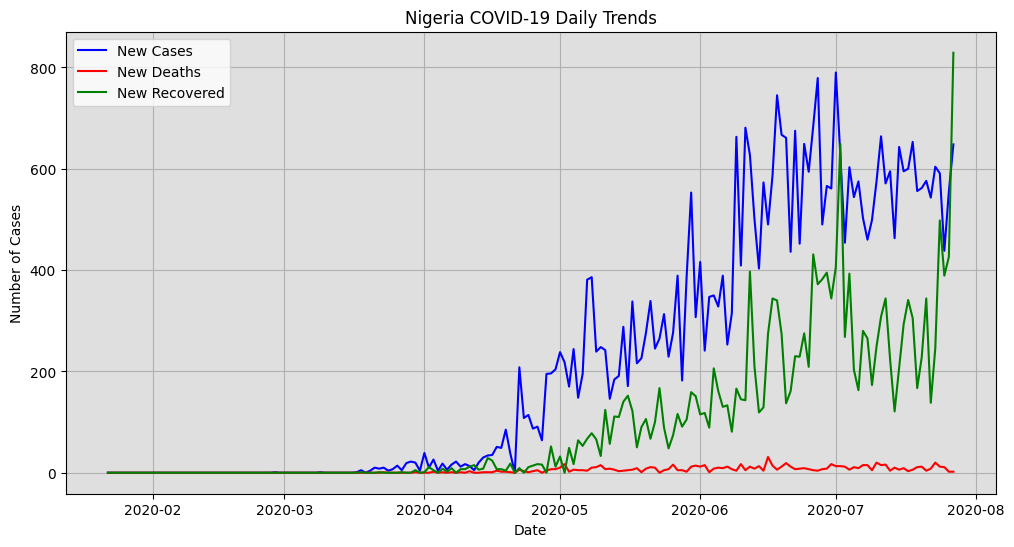

In [65]:
#nigeria daily cases trend
country_daily_trends = mydata2[mydata2["Country/Region"] == "Nigeria"]
country_daily_trends = country_daily_trends.groupby("Date")[["New cases", "New deaths", "New recovered"]].sum()
print(country_daily_trends)

#plotting a line chart for country daily trends
plt.figure(figsize=(12, 6))
plt.plot(country_daily_trends.index, country_daily_trends['New cases'], label='New Cases', color='blue')
plt.plot(country_daily_trends.index, country_daily_trends['New deaths'], label='New Deaths', color='red')
plt.plot(country_daily_trends.index, country_daily_trends['New recovered'], label='New Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Nigeria COVID-19 Daily Trends')
plt.legend()
plt.grid()

#adding background color
plt.gca().patch.set_facecolor('silver')
plt.gca().patch.set_alpha(0.5)
plt.show()

#The high variability in daily new cases highlights potential testing irregularities or localized outbreaks.
#The steady increase in recoveries suggests improving healthcare capacity but mirrors case spikes, indicating response challenges.
#The consistently low daily deaths reinforce Nigeria's relatively low fatality rate, possibly due to demographic factors or treatment success.
#Fluctuations in both cases and recoveries underscore the importance of sustaining consistent testing and healthcare measures.



In [66]:
# Summarizing trends for Nigeria
country_name = "Nigeria"
nig_trend = country_trends[country_trends['Country/Region'] == country_name]

# Calculate summary statistics
nig_summary = {
    "Peak Confirmed":nig_trend["Confirmed"].max(),
    "Peak Deaths": nig_trend["Deaths"].max(),
    "Peak Recovered":nig_trend["Recovered"].max(),
    "Peak Active Cases": nig_trend["Active"].max(),
    "Date of Peak Active Cases": nig_trend.loc[nig_trend["Active"].idxmax(), "Date"]
}

nig_summary




{'Peak Confirmed': 41180,
 'Peak Deaths': 860,
 'Peak Recovered': 18203,
 'Peak Active Cases': 22300,
 'Date of Peak Active Cases': Timestamp('2020-07-26 00:00:00')}

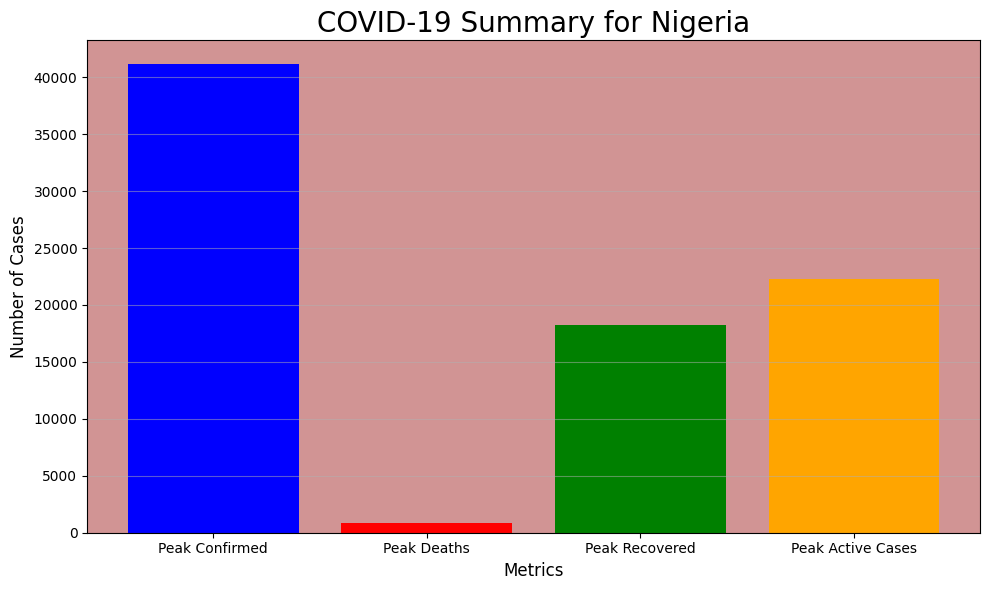

In [67]:
# Plotting the summary for Nigeria as a bar chart

# Prepare data for plotting
summary_labels = ["Peak Confirmed", "Peak Deaths", "Peak Recovered", "Peak Active Cases"]
summary_values = [
    nig_summary["Peak Confirmed"],
    nig_summary["Peak Deaths"],
    nig_summary["Peak Recovered"],
    nig_summary["Peak Active Cases"]
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(summary_labels, summary_values, color=['blue', 'red', 'green', 'orange'])
plt.title("COVID-19 Summary for Nigeria", fontsize=20)
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

#adding backgroud color
plt.gca().patch.set_facecolor('brown')
plt.gca().patch.set_alpha(0.5)
plt.show()


In [68]:
#calculate total recovered in Nigeria
total_recovered = nig_trend["Recovered"].sum()
print(f"Total Recovered: {total_recovered}")

Total Recovered: 600928


Global Fatality Rate: 5.79%
Africa Fatality Rate: 2.02%
Nigeria Fatality Rate: 2.41%


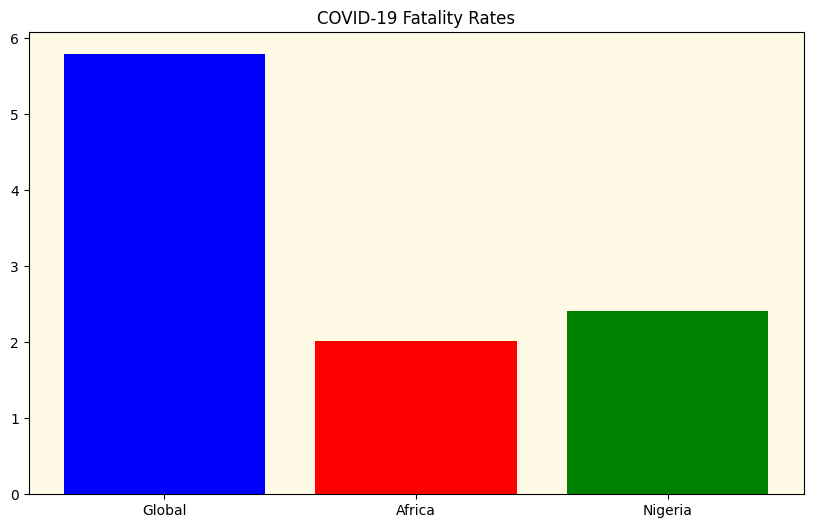

In [69]:
#GLOBAL MORTALITY RATE
global_fatality_rate = (datewise["Deaths"].sum() / datewise["Confirmed"].sum()) * 100
print(f"Global Fatality Rate: {global_fatality_rate:.2f}%")


#AFRICA MORTALITY RATE
africa_fatality_rate = (africa_trends["Deaths"].sum() / africa_trends["Confirmed"].sum()) * 100
print(f"Africa Fatality Rate: {africa_fatality_rate:.2f}%")

#NIGERIA MORTALITY RATE
nig_fatality_rate = (nig_trend["Deaths"].sum() / nig_trend["Confirmed"].sum()) * 100
print(f"Nigeria Fatality Rate: {nig_fatality_rate:.2f}%")

#plotting a barchart for mortality rate
fatality_rates = {
    "Global": global_fatality_rate,
    "Africa": africa_fatality_rate,
    "Nigeria": nig_fatality_rate,
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(fatality_rates.keys(), fatality_rates.values(), color=['blue', 'red', 'green'])
plt.title("COVID-19 Fatality Rates")

#adding backgroud color
plt.gca().patch.set_facecolor('gold')
plt.gca().patch.set_alpha(0.1)

#Nigeria's fatality rate is slightly higher than Africa's overall rate but remains well below the global average, suggesting effective mitigation strategies in the Nigerian context or other unique local factors.


                WHO Region Country/Region  CaseFatalityRate
104  Eastern Mediterranean          Yemen         11.184468
99   Eastern Mediterranean          Sudan         10.357660
182        Western Pacific    Philippines         10.344681
130                 Europe          Italy         10.120106
111                 Europe        Belgium          9.681649
66                Americas         Guyana          8.387979
71                Americas      Nicaragua          8.065372
126                 Europe        Hungary          7.885851
153                 Europe          Spain          7.670904
142                 Europe    Netherlands          7.133532


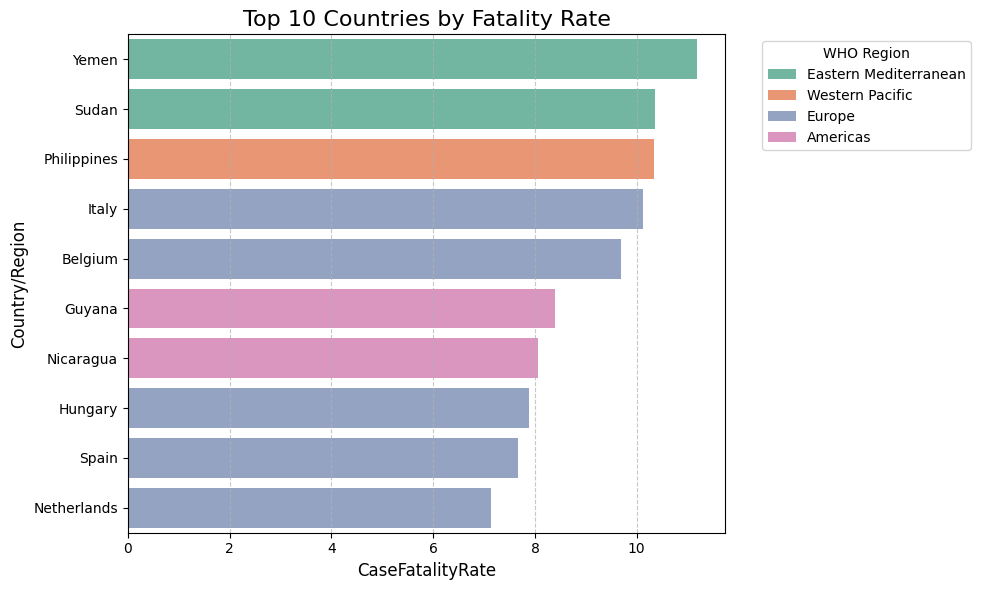

In [70]:
# Group data by WHO Region and Country/Region
fatality_rate_grouped = (
    mydata2.groupby(['WHO Region', 'Country/Region'])['CaseFatalityRate']
    .mean()
    .reset_index()
    .sort_values(by='CaseFatalityRate', ascending=False)  # Sort by Fatality Rate (optional)
)

# Display the top 10 rows for verification
print(fatality_rate_grouped.head(10))

# Save to a CSV file (optional)
#fatality_rate_grouped.to_csv('/mnt/data/fatality_rate_by_region_and_country.csv', index=False)

# Optional: Visualize with a bar plot for top countries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 countries by fatality rate
top_countries_fatality_rate = fatality_rate_grouped.head(10)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries_fatality_rate,
    y='Country/Region',
    x='CaseFatalityRate',
    hue='WHO Region',
    dodge=False,
    palette='Set2'
)
plt.title('Top 10 Countries by Fatality Rate', fontsize=16)
plt.xlabel('CaseFatalityRate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#europe has up to five countries ranking among the top ten countries with highest fatality rate
#eastern mediterranean has the highest fatality rate by country with two countries among the top ten, Yemen ranking number 1
#africa is not among

                WHO Region  Country/Region  MortalityRate
80                Americas              US       0.000926
54                Americas          Brazil       0.000331
130                 Europe           Italy       0.000312
153                 Europe           Spain       0.000255
70                Americas          Mexico       0.000145
164        South-East Asia           India       0.000093
87   Eastern Mediterranean            Iran       0.000086
111                 Europe         Belgium       0.000081
122                 Europe         Germany       0.000073
159                 Europe  United Kingdom       0.000057


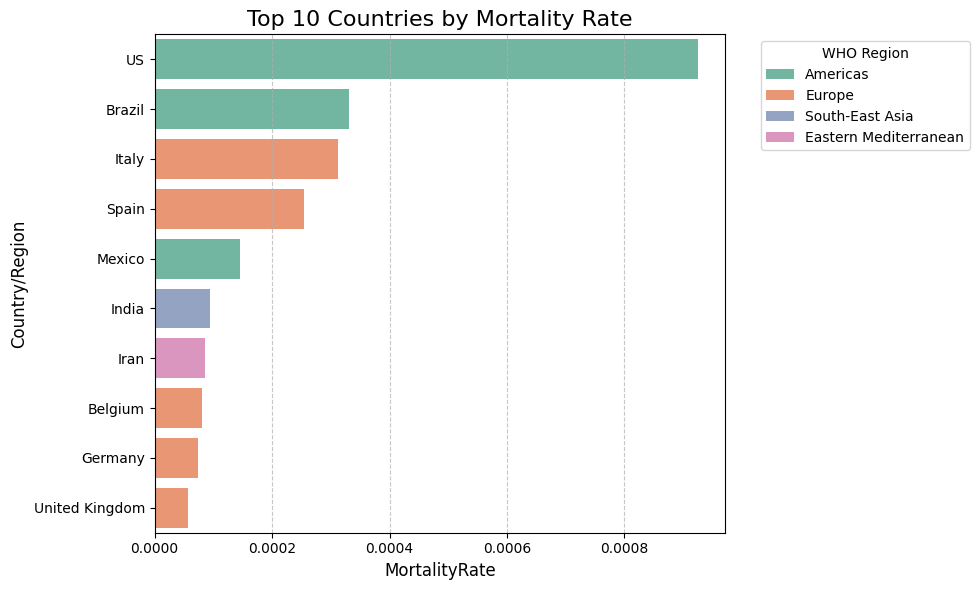

In [71]:
# Group data by WHO Region and Country/Region
mortality_rate_grouped = (
    mydata2.groupby(['WHO Region', 'Country/Region'])['MortalityRate']
    .mean()
    .reset_index()
    .sort_values(by='MortalityRate', ascending=False)
)

# Display the top 10 rows for verification
print(mortality_rate_grouped.head(10))

#Visualize with a bar plot for top countries
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 countries by mortality rate
top_countries_mortality_rate = mortality_rate_grouped.head(10)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries_mortality_rate,
    y='Country/Region',
    x='MortalityRate',
    hue='WHO Region',
    dodge=False,
    palette='Set2'
)
plt.title('Top 10 Countries by Mortality Rate', fontsize=16)
plt.xlabel('MortalityRate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#europe has up to five countries ranking among the top ten countries with highest mortality rate
#Americas has the highest mortality rate by country with tHree countries among the top ten, US ranking number 1
#africa is not among

Correlation Matrix:
                  Confirmed    Deaths  Recovered    Active  CaseFatalityRate
Confirmed          1.000000  0.951382   0.902867  0.969917          0.106453
Deaths             0.951382  1.000000   0.841802  0.925069          0.225823
Recovered          0.902867  0.841802   1.000000  0.771563          0.117970
Active             0.969917  0.925069   0.771563  1.000000          0.080940
CaseFatalityRate   0.106453  0.225823   0.117970  0.080940          1.000000


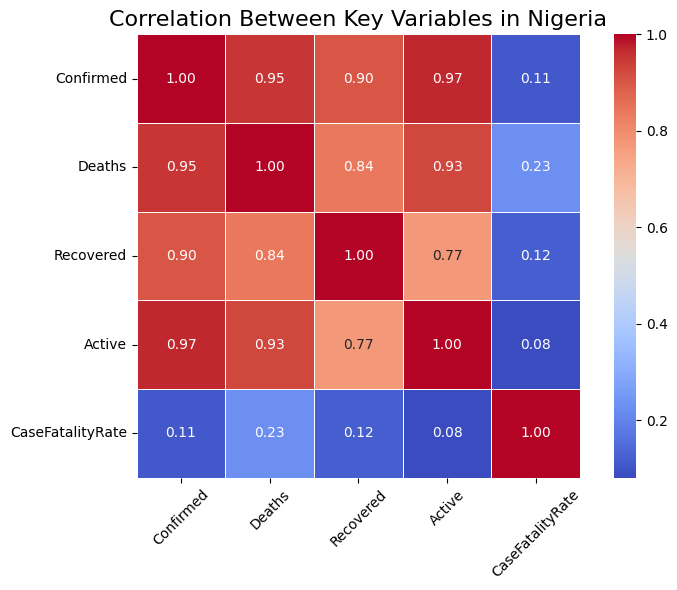

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
# Changed: Use parentheses for groupby and apply aggregation (e.g., mean)
key_variables = mydata2.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered', 'Active', 'CaseFatalityRate']].mean()
# Removed: [Country/Region=="Nigeria"]  (This line was causing syntax errors and seemed out of place)
correlation_data = key_variables # Changed: Correlation data should be the aggregated data

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show correlation values
    fmt=".2f",             # Format the correlation values
    cmap='coolwarm',       # Color palette
    cbar=True,             # Include a color bar
    square=True,           # Make cells square-shaped
    linewidths=0.5         # Add lines between cells
)
plt.title('Correlation Between Key Variables in Nigeria', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

#Confirmed cases are highly correlated with deaths (0.95), recovered cases (0.90), and active cases (0.97), indicating that higher case numbers often lead to proportional changes in these outcomes.
#Deaths and recovered cases have a moderately strong positive correlation (0.84), suggesting that as deaths increase, recoveries also trend upward, potentially reflecting disease progression over time.
#The case fatality rate (CFR) shows weak correlations with other variables (e.g., 0.23 with deaths and 0.11 with confirmed cases), indicating that CFR is influenced by factors other than raw case counts, such as healthcare quality and timeliness of intervention.
#Active cases correlate strongly with confirmed cases (0.97), as expected, since they are part of the total count but less strongly with recoveries (0.77)
#This analysis highlights that while case counts predict certain outcomes, CFR may require a separate focus on qualitative factors like healthcare resources and treatment strategies.



In [73]:
import plotly.express as px
import pandas as pd

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Convert the matrix to a long format for Plotly
correlation_long = correlation_matrix.reset_index().melt(id_vars='index')
correlation_long.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Create an interactive heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=True,             # Show correlation values
    color_continuous_scale='RdBu_r',  # Diverging color scale
    labels=dict(color='Correlation'),
    title='Interactive Correlation Heatmap',
    aspect='auto'               # Fit the heatmap to the screen
)

# Customize the hover data
fig.update_traces(hovertemplate='<b>%{x}</b> and <b>%{y}</b><br>Correlation: %{z:.2f}')

# Show the figure
fig.show()


In [74]:
# Aggregating data by country if needed
map_data = mydata2.groupby(['Country/Region', 'Lat', 'Long'], as_index=False).agg({
    'Confirmed': 'sum',  # Or any other appropriate aggregation for numerical columns
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum',
    # ... other numerical columns you want to aggregate ...
    'Date': 'first'  # Example: Taking the first date for each group
    # ... other non-numerical columns with appropriate aggregations ...
})

fig = px.scatter_geo(
    map_data,
    lat='Lat',
    lon='Long',
    size='Confirmed',
    color='Confirmed',
    hover_name='Country/Region',
    hover_data={'Confirmed': True, 'Deaths': True},  # Additional hover details
    projection='natural earth',  # Map projection style
    title='Global COVID-19 Confirmed Cases'
)

# Update layout for better aesthetics
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightblue",
        showcountries=True,
        countrycolor="gray"
    ),
    coloraxis_colorbar=dict(title="Confirmed Cases")
)

fig.show()

#### **Phase 3 - Model Development and Building**

In [75]:

# Define the features
features = ['Confirmed', 'Recovered', 'Active', 'Population']
x = np.array(mydata2[features])
y = np.array(mydata2["Deaths"])



In [76]:
#splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Task 1: Training Model**

In [77]:
#training model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### **Task 2: Testing Model**

In [78]:
#making predictions
deaths_predictions = model.predict(x_test)
deaths_predictions

array([9.99999994e-01, 4.30000000e+01, 6.69686528e-11, ...,
       9.80000000e+01, 9.99999995e-01, 9.99999995e-01])

In [79]:
#calculating accuracy
from sklearn.metrics import r2_score, mean_squared_error

# R-squared
r2 = r2_score(y_test, deaths_predictions)
print(f"Model R-squared:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, deaths_predictions)
print(f"Model MSE:", mse)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, deaths_predictions, squared=False) # squared=False for RMSE
print(f"Model RMSE:", rmse)

Model R-squared: 1.0
Model MSE: 4.451348078192305e-16
Model RMSE: 2.1098218119529208e-08


#### **Task 3: Model Visualization**

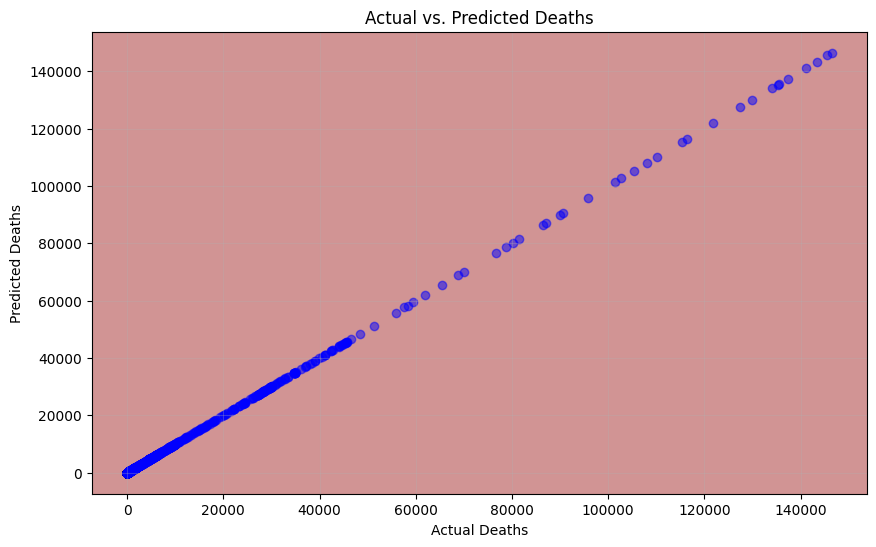

In [80]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, deaths_predictions, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Deaths')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.grid(alpha=0.3)

#adding backgroud color
plt.gca().patch.set_facecolor('brown')
plt.gca().patch.set_alpha(0.5)
plt.show()


#The model suggests that confirmed cases, recovered cases, active cases, and population are significant predictors of COVID-19 deaths.
#The high R-squared value indicates that the model explains a large portion of the variability in deaths.
#The relatively low MSE and RMSE suggest that the model is reasonably accurate in its predictions.


In [81]:
#comparing predictions with actual values
result = pd.DataFrame({"Actual": y_test, "Predicted": deaths_predictions})
result

,Actual,Predicted
0,1,1.000000e+00
1,43,4.300000e+01
2,0,6.696865e-11
3,6,6.000000e+00
4,33,3.300000e+01
...,...,...
10035,0,1.716254e-09
10036,1743,1.743000e+03
10037,98,9.800000e+01
10038,1,1.000000e+00


### Task 4: Time Series Forecast Model

In [82]:
!pip uninstall --upgrade pip
!pip install prophet


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: --upgrade


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0a3lu1n/e27ib50a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0a3lu1n/vxyxvyta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17302', 'data', 'file=/tmp/tmpc0a3lu1n/e27ib50a.json', 'init=/tmp/tmpc0a3lu1n/vxyxvyta.json', 'output', 'file=/tmp/tmpc0a3lu1n/prophet_modelxqfdll5l/prophet_model-20241206234521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:45:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:45:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


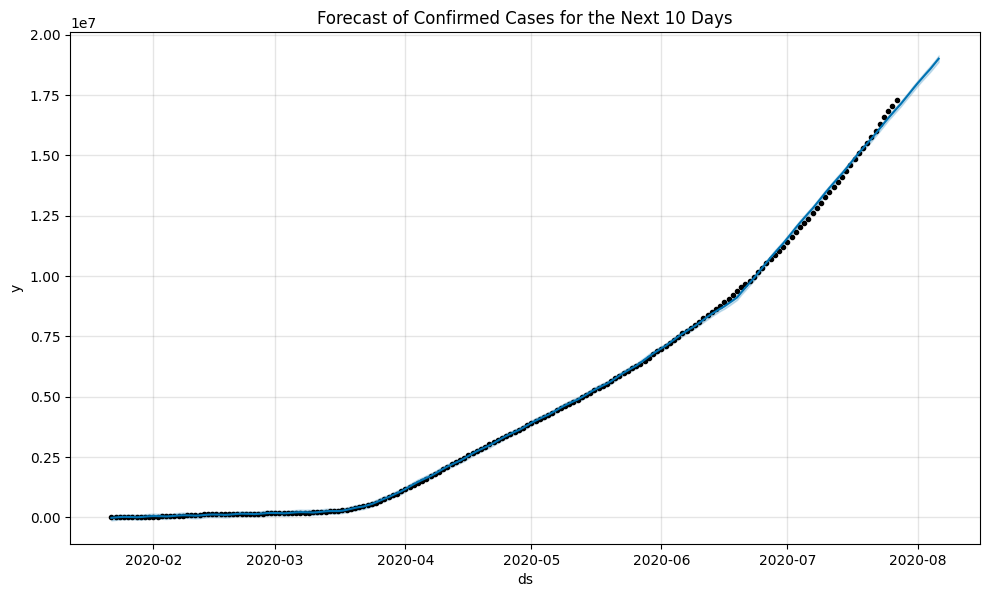

            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.712831e+07  1.702215e+07  1.724076e+07
189 2020-07-29  1.733989e+07  1.724095e+07  1.745205e+07
190 2020-07-30  1.755681e+07  1.745067e+07  1.766370e+07
191 2020-07-31  1.777445e+07  1.766157e+07  1.789236e+07
192 2020-08-01  1.798379e+07  1.787616e+07  1.809968e+07
193 2020-08-02  1.818379e+07  1.807487e+07  1.830172e+07
194 2020-08-03  1.838078e+07  1.826228e+07  1.850812e+07
195 2020-08-04  1.857220e+07  1.845280e+07  1.870340e+07
196 2020-08-05  1.878379e+07  1.866076e+07  1.890968e+07
197 2020-08-06  1.900070e+07  1.887086e+07  1.913692e+07


In [83]:

from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric


# Create a new dataframe for Prophet
prophet_data = mydata2[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
prophet_data = prophet_data.groupby('ds')[['y']].sum().reset_index()
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates (10 days ahead)
future = model.make_future_dataframe(periods=10)

# Forecast the values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Confirmed Cases for the Next 10 Days')
plt.show()

# Extract and display the forecast for the next 10 days
next_10_days_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
print(next_10_days_forecast)

#The black dots represent the actual confirmed cases from February 2020 to late July 2020.
#The data shows a clear exponential growth pattern, reflecting the rapid spread of COVID-19 during this period.
#The blue line represents the Prophet model's forecast for the confirmed cases in the next 10 days.
#The forecast follows the trajectory of exponential growth, suggesting that the number of confirmed cases will continue to rise significantly.
#The y-axis scale shows confirmed cases in tens of millions. The rapid progression to approximately 20 million cases highlights the urgency of containment measures.

#INSIGHTS
#The continued exponential trend underscores that the virus is spreading rapidly in the population, likely due to high transmission rates and inadequate containment in some regions.
#The next 10 days are predicted to add a substantial number of confirmed cases, stressing the need for immediate action to slow down the transmission.

#MODEL ACCURACY: The close alignment between the historical data points (black dots) and the forecasted trend (blue line) indicates that the Prophet model has captured the growth pattern accurately.




In [84]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract actual and predicted values
actual_values = prophet_data['y'].values  # Actual confirmed cases from your prophet_data DataFrame
predicted_values = forecast['yhat'].values[:len(actual_values)]  # Predicted cases, aligned with actual data length

# Ensure both arrays have the same length for comparison
# Consider only the overlapping period for evaluation
min_len = min(len(actual_values), len(predicted_values))
actual_values = actual_values[:min_len]
predicted_values = predicted_values[:min_len]


# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
# Avoid division by zero; replace zeros in actual_values with a small value
actual_values_nonzero = np.where(actual_values == 0, 1e-10, actual_values)
mape = np.mean(np.abs((np.array(actual_values) - np.array(predicted_values)) / actual_values_nonzero)) * 100


# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 46667.378236915756
MSE: 6978494422.546025
RMSE: 83537.3833834052
MAPE: 26.08%


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0a3lu1n/h17d_t2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc0a3lu1n/0w4a9c6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84241', 'data', 'file=/tmp/tmpc0a3lu1n/h17d_t2n.json', 'init=/tmp/tmpc0a3lu1n/0w4a9c6v.json', 'output', 'file=/tmp/tmpc0a3lu1n/prophet_modelycwj4roo/prophet_model-20241206234522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


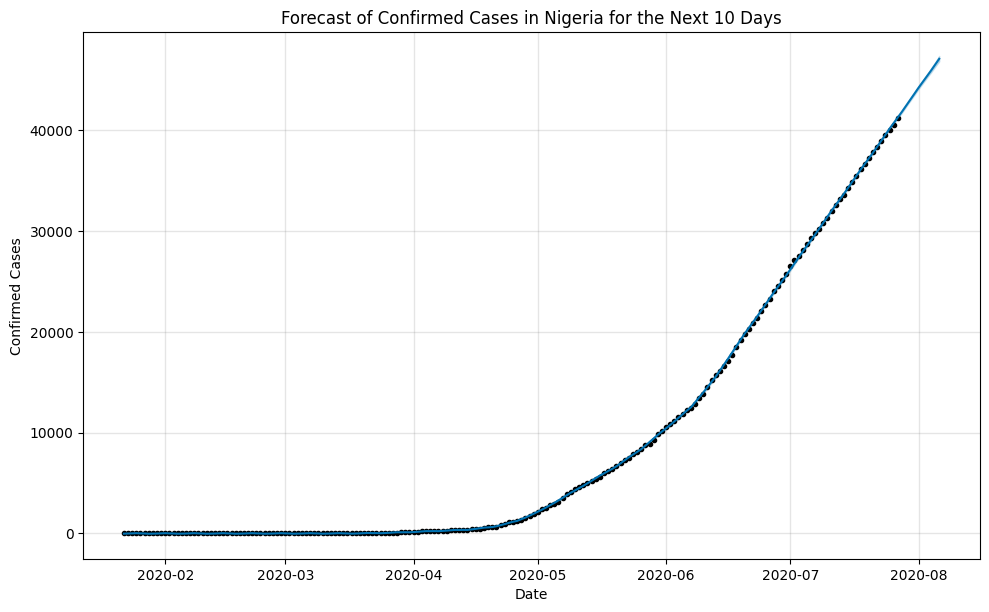

            ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  41838.494959  41733.785329  41932.264530
189 2020-07-29  42426.452147  42336.131345  42523.869409
190 2020-07-30  43018.754651  42917.764189  43129.078126
191 2020-07-31  43615.427603  43490.683891  43722.065091
192 2020-08-01  44214.431187  44083.109354  44336.963773
193 2020-08-02  44773.496024  44638.244167  44918.494737
194 2020-08-03  45345.533057  45183.570472  45503.614360
195 2020-08-04  45901.997363  45725.481944  46108.181855
196 2020-08-05  46489.954551  46285.729385  46719.722543
197 2020-08-06  47082.257056  46840.942163  47367.233113


In [85]:
#Forecast for Nigeria For next ten days using prophet


# Filter the data for Nigeria
nigeria_data = mydata2[mydata2['Country/Region'] == 'Nigeria']

# Group by date and sum (if data is at a regional level within Nigeria)
nigeria_data = nigeria_data.groupby('Date')['Confirmed'].sum().reset_index()

# Prepare data for Prophet
nigeria_data = nigeria_data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model to Nigeria's data
model.fit(nigeria_data)

# Create a dataframe for future dates (next 10 days)
future = model.make_future_dataframe(periods=10)

# Forecast the next 10 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Confirmed Cases in Nigeria for the Next 10 Days')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Print forecast for the next 10 days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


#


In [86]:
#Continued Growth: The forecast suggests a continued upward trend in confirmed cases in Nigeria over the next 10 days. This indicates that the virus is still spreading within the population.

#Potential Acceleration: The trend line in the forecast plot may show a slight acceleration in the growth rate, meaning that the daily increase in cases could become larger over the coming days.

#Uncertainty: The forecast also includes confidence intervals (yhat_lower and yhat_upper), indicating a range of possible values for confirmed cases. This uncertainty highlights the inherent limitations of forecasting and the possibility of variations in actual case numbers.